In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Load the dataset
train = pd.read_csv("termdeposit_train.csv")
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


This dataset contains the details of customer having term deposit or not, here subscribed column is a target variable and others are independent variables. Its a classification problem.

In [35]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [36]:
train.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [37]:
train.tail(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31632,5195,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,yes
31633,9847,50,technician,married,tertiary,no,3117,no,no,unknown,9,jun,174,1,-1,0,unknown,no
31634,8652,30,technician,single,tertiary,no,432,yes,yes,unknown,3,jun,180,3,-1,0,unknown,no
31635,41379,35,management,married,tertiary,no,4,no,no,cellular,1,sep,157,2,-1,0,unknown,no
31636,20954,48,housemaid,married,primary,no,469,no,no,cellular,14,aug,103,2,-1,0,unknown,no
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no


In [38]:
test = pd.read_csv("termdeposit_test.csv")
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [39]:
test.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [40]:
print(train.isnull().sum())
print('\n',test.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

 ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


There is no null value present in any dataset.

In [41]:
#Converting catagorical variables using one hot encoder
# One-hot encode categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
train = pd.get_dummies(train, columns=categorical_features, drop_first=True)
test = pd.get_dummies(test, columns=categorical_features, drop_first=True)


In [42]:
#Normalising Numerical Values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])


In [55]:
train['subscribed'] = train['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

In [56]:
print(train.shape)
print(test.shape)

(31647, 44)
(13564, 43)


Train dataset contain 31647 rows and 44 columns and test dataset contain 13564 rows and 43 columns. 

In [57]:
print(train.dtypes)
print('\n',test.dtypes)

ID                       int64
age                    float64
balance                float64
day                      int64
duration               float64
campaign               float64
pdays                  float64
previous               float64
subscribed               int64
job_blue-collar           bool
job_entrepreneur          bool
job_housemaid             bool
job_management            bool
job_retired               bool
job_self-employed         bool
job_services              bool
job_student               bool
job_technician            bool
job_unemployed            bool
job_unknown               bool
marital_married           bool
marital_single            bool
education_secondary       bool
education_tertiary        bool
education_unknown         bool
default_yes               bool
housing_yes               bool
loan_yes                  bool
contact_telephone         bool
contact_unknown           bool
month_aug                 bool
month_dec                 bool
month_fe

Three data types are present i.e bool,int64,float64. 

In [58]:
print(train.nunique().to_frame("No. of unique values"))
print('\n',test.nunique().to_frame("No. of unique values"))

                     No. of unique values
ID                                  31647
age                                    76
balance                              6326
day                                    31
duration                             1454
campaign                               45
pdays                                 509
previous                               38
subscribed                              2
job_blue-collar                         2
job_entrepreneur                        2
job_housemaid                           2
job_management                          2
job_retired                             2
job_self-employed                       2
job_services                            2
job_student                             2
job_technician                          2
job_unemployed                          2
job_unknown                             2
marital_married                         2
marital_single                          2
education_secondary               

It shows that no column has same values are present.

In [59]:
print('Total Duplicated Rows are ',train.duplicated().sum())
print('Total Duplicated Rows are ',test.duplicated().sum())

Total Duplicated Rows are  0
Total Duplicated Rows are  0


In [60]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,3.164700e+04,3.164700e+04,31647.000000,3.164700e+04,3.164700e+04,3.164700e+04,3.164700e+04,31647.000000
mean,22563.972162,-3.412725e-17,2.626900e-17,15.835466,-2.200309e-17,-4.602688e-17,3.592342e-18,-1.223641e-17,0.117389
std,13075.936990,1.000016e+00,1.000016e+00,8.337097,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,0.321888
min,2.000000,-2.160689e+00,-3.098446e+00,1.000000,-1.003884e+00,-5.670587e-01,-4.085548e-01,-2.370587e-01,0.000000
25%,11218.000000,-7.489197e-01,-4.262817e-01,8.000000,-5.993956e-01,-5.670587e-01,-4.085548e-01,-2.370587e-01,0.000000
50%,22519.000000,-1.842121e-01,-3.017876e-01,16.000000,-3.038079e-01,-2.459057e-01,-4.085548e-01,-2.370587e-01,0.000000
75%,33879.500000,6.628494e-01,2.216118e-02,21.000000,2.348618e-01,7.524724e-02,-4.085548e-01,-2.370587e-01,0.000000
max,45211.000000,5.086393e+00,3.327430e+01,31.000000,1.812375e+01,1.934443e+01,8.371499e+00,1.132825e+02,1.000000


There are 31647 observations are present in the dataset. There is slight difference between median(50%) and the mean value, it means there is chances of little skewness.

subscribed
no     27932
yes     3715
Name: count, dtype: int64


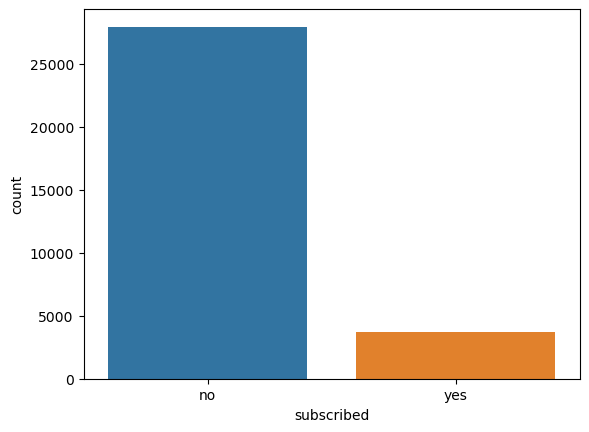

In [61]:
ax = sns.countplot(x='subscribed', data=df)
print(df['subscribed'].value_counts())

It shows that less than 5000 people is only subscribed to term deposit.

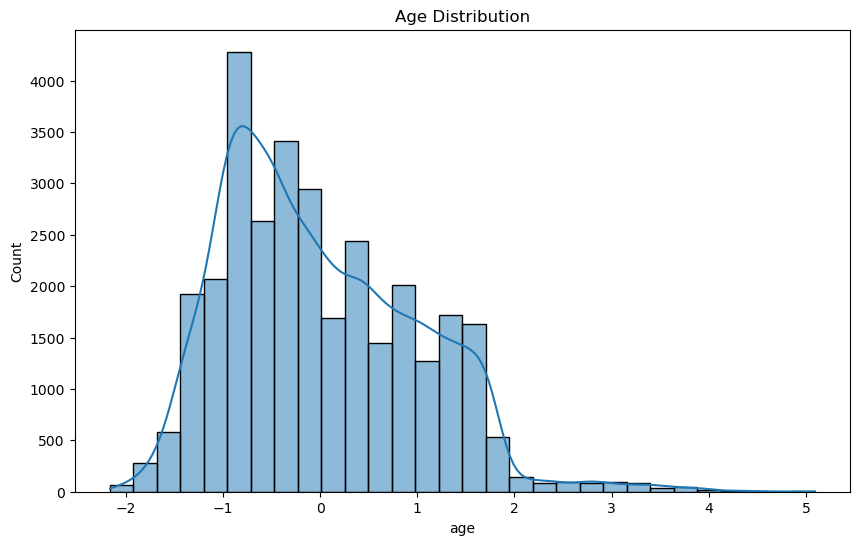

In [49]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

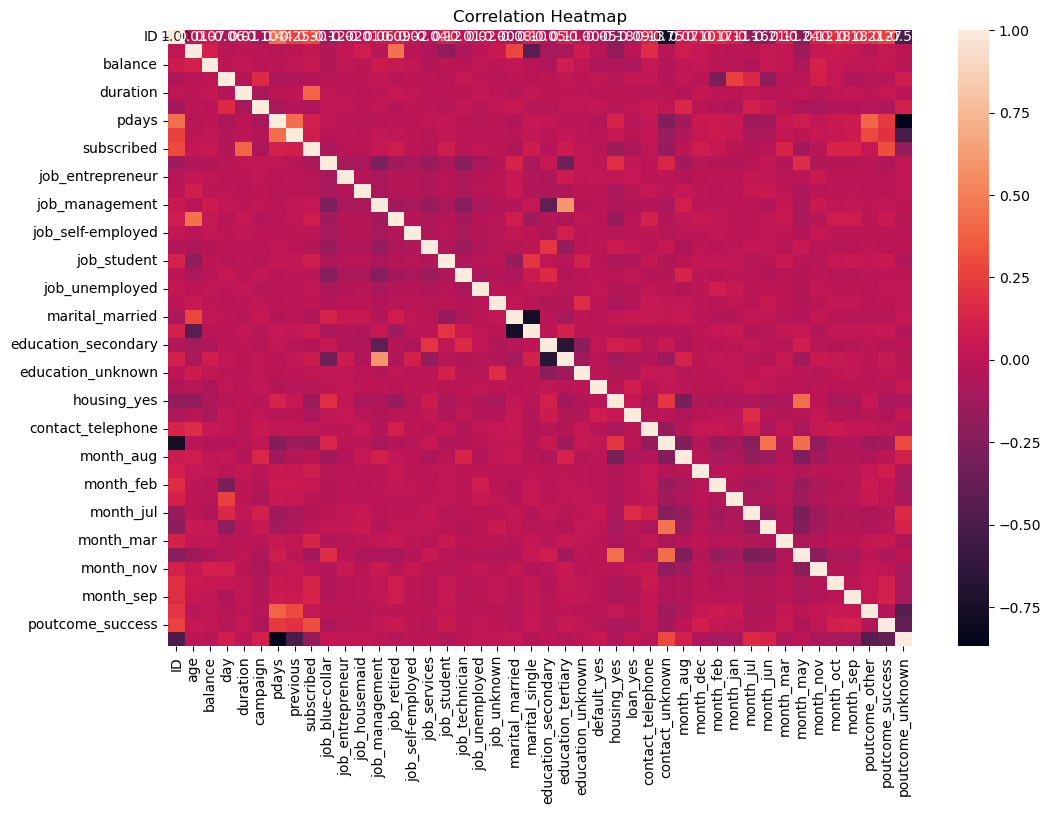

In [62]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

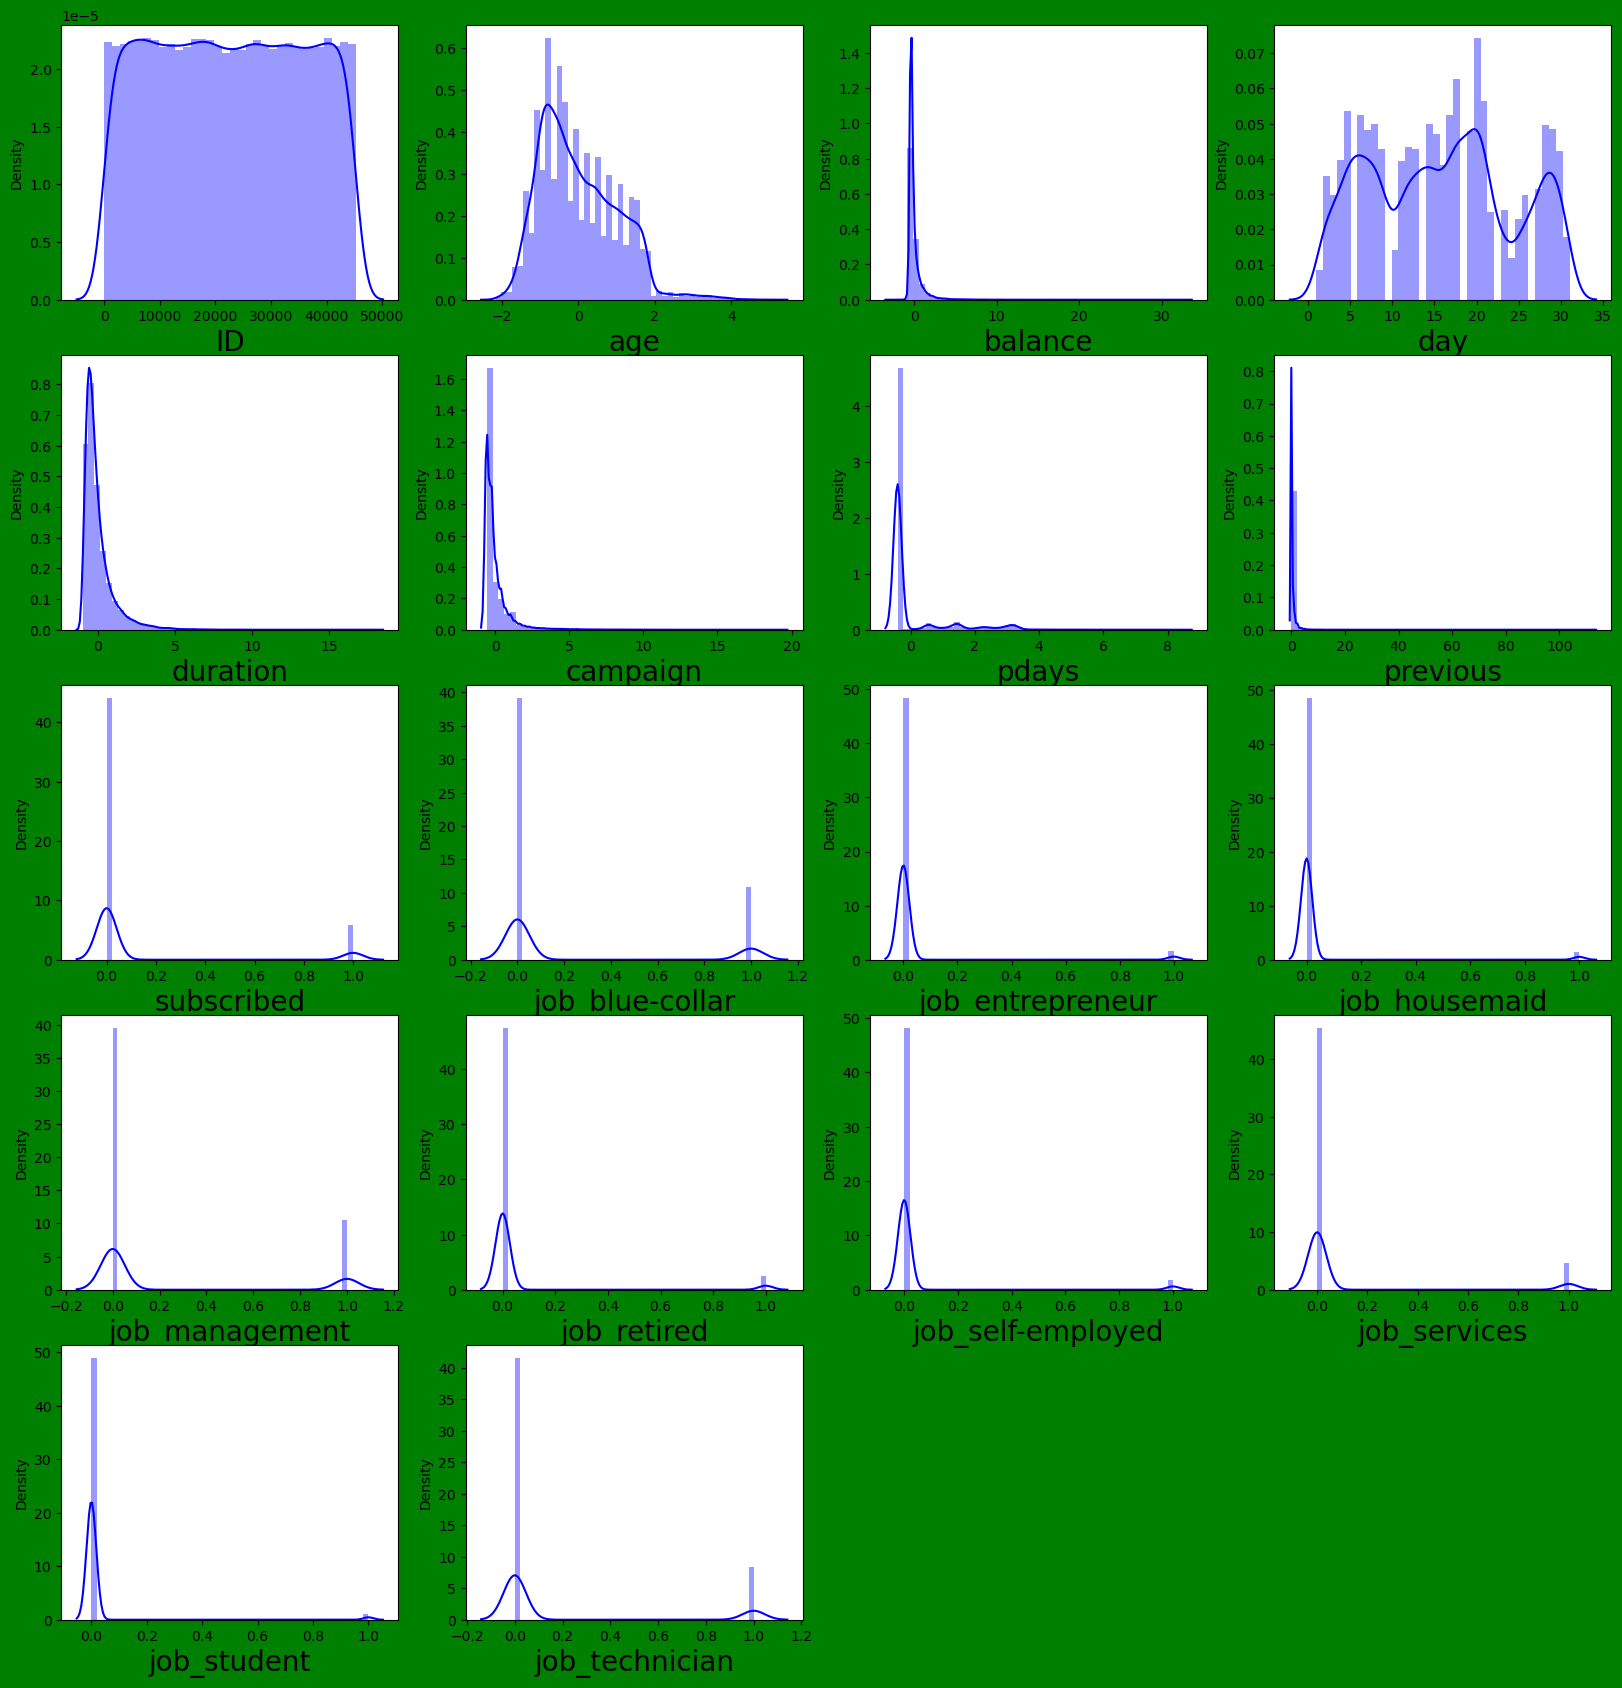

In [63]:
plt.figure(figsize=(20,25), facecolor="green")
plotnumber = 1
for column in train:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(train[column], color ='b')
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

In [64]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663,-0.121656,...,-0.159016,-0.208083,0.114475,-0.238047,0.118076,0.178456,0.180922,0.209052,0.265963,-0.496277
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538,-0.046797,...,0.004957,0.048587,0.022598,-0.128285,0.036428,0.058387,0.040462,-0.015908,0.029112,-0.000885
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807,-0.051048,...,-0.060623,0.035545,0.025238,-0.069464,0.116274,0.040273,0.013423,0.009141,0.028584,-0.027209
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600,-0.017137,...,0.152008,-0.196153,-0.024551,-0.020473,0.095541,0.031461,-0.052942,-0.027566,-0.028971,0.079794
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838,0.008423,...,0.014847,-0.016949,-0.008491,0.007397,-0.008458,0.013256,0.015145,-0.002115,0.036574,-0.002768
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607,0.011835,...,0.106989,0.048353,-0.019126,-0.066412,-0.084276,-0.050919,-0.038044,-0.020246,-0.057645,0.107196
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290,0.014206,...,-0.134470,-0.114253,0.037521,0.075042,0.012283,0.056424,0.072536,0.393408,0.229305,-0.868844
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081,-0.017275,...,-0.080382,-0.059557,0.023289,0.002417,0.038587,0.049107,0.061083,0.297019,0.189952,-0.504232
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000,-0.074922,...,-0.034799,-0.016972,0.127090,-0.103581,-0.017918,0.127530,0.124028,0.032693,0.309125,-0.171144
job_blue-collar,-0.121656,-0.046797,-0.051048,-0.017137,0.008423,0.011835,0.014206,-0.017275,-0.074922,1.000000,...,-0.012634,0.015663,-0.043016,0.171407,-0.049513,-0.043012,-0.041842,-0.002122,-0.053518,0.028174


In [66]:
from sklearn.preprocessing import StandardScaler

x = train.drop(columns=['ID', 'subscribed'])  # Select only the remaining numerical columns for scaling
y = train['subscribed']

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [68]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu =0
maxRS = 0
for i in range(1,100):
    x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_val)
    acc = accuracy_score(y_val,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum accuracy is ', maxAccu,'On random_state ',maxRS) 

Maximum accuracy is  0.9116377040547656 On random_state  4


In [69]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=maxRS)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=maxRS)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = best_model.predict(x_val)
y_pred_proba = best_model.predict_proba(x_val)[:, 1]

print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_proba)}")


Accuracy: 0.9056872037914692
Precision: 0.6475195822454308
Recall: 0.3492957746478873
F1 Score: 0.4537968892955169
ROC-AUC: 0.9250010024560172


In [76]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_val, y_pred)-score.mean())

[0.90695103 0.90758294 0.90045821 0.90788434 0.90219624]
0.905014550988616
Difference between Accuracy score and cross val score is -  0.0006726528028531131


In [77]:
#Apply the Model to the test data
# Prepare test data for prediction
X_test = test.drop(columns=['ID'])
test_ids = test['ID']

# Predict on test data
test_predictions = best_model.predict(X_test)
output = pd.DataFrame({'ID': test_ids, 'subscribed': test_predictions})
output['subscribed'] = output['subscribed'].apply(lambda x: 'yes' if x == 1 else 'no')


In [82]:
# Save the predictions
output.to_csv('test_predictions.csv', index=False)
